In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [4]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 500, 375),Image (3, 352, 500),Image (3, 500, 281),Image (3, 500, 375),Image (3, 1500, 2000)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 265, 500),Image (3, 375, 500),Image (3, 333, 500),Image (3, 375, 500),Image (3, 375, 500)
y: CategoryList
class-543,class-204,class-204,class-337,class-78
Path: train;

Test: None

In [5]:
data = src.transform(size=(512,512)).databunch(bs=36).normalize()

In [6]:
data.c

45

In [7]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=1.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [8]:
loss_func = FocalLoss(gamma=2.5)

In [9]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,pretrained=False)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
learn=learn.to_fp16()

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


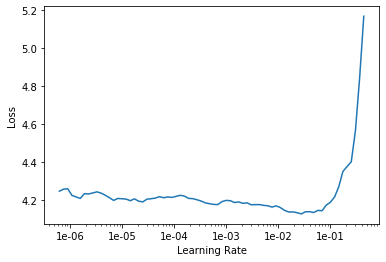

In [13]:
learn.recorder.plot()

In [14]:
learn.fit(1,1e-7)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,4.189361,3.855683,0.978645,0.021355,0.016472,15:41


In [15]:
learn.save('exp3-round-1')

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


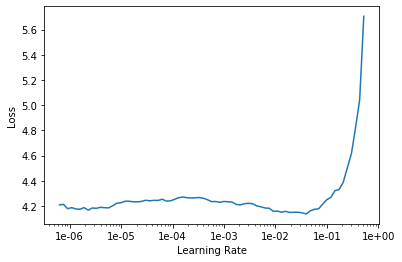

In [17]:
learn.recorder.plot()

In [ ]:
data = src.transform(size=(1024,1024)).databunch(bs=8).normalize(imagenet_stats)

In [ ]:
learn.data=data

In [ ]:
learn = learn.to_fp16()

In [ ]:
learn

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
lr=1e-5

In [ ]:
learn.fit_one_cycle(2,lr)

In [ ]:
learn.save('densenet-1024-1e5-2')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
lr = 5e-4

In [ ]:
learn.fit_one_cycle(2,lr)

In [ ]:
learn.save('densenet-1024-5e4-2')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5,slice(1e-7,1e-5))